# 📌 Extracão

In [ ]:
# 📦 Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Carregando os dados da API (JSON no GitHub)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
df = pd.read_json(url)

# 🔍 Explorando a estrutura dos dados
print(df.head())
print(df.columns)
print(df.info())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

# 🔧 Transformação

In [ ]:
# Desaninhando colunas que são dicionários (nested JSON)
df_final = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)

# Conferindo após desaninhamento
print(df_final.columns)
print(df_final.head())
print(df_final.info())

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges'],
      dtype='object')
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          Yes            No             DSL             No          Yes   
1          Yes           Yes             DSL       

In [ ]:
# Verificando as colunas atuais
print("\nColunas atuais no DataFrame:")
print(df.columns)

# Desaninhando as colunas que estão como dicionário
df_expandido = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)

# Verificando as colunas após o desaninhamento
print("\nColunas após desaninhamento:")
print(df_expandido.columns)

# Conferindo se existe a coluna 'Charges' (normalmente vem como dicionário)
if 'Charges' in df_expandido.columns:
    df_expandido['MonthlyCharges'] = df_expandido['Charges'].apply(lambda x: x.get('Monthly') if pd.notnull(x) else None)
    df_expandido['TotalCharges'] = df_expandido['Charges'].apply(lambda x: x.get('Total') if pd.notnull(x) else None)
    df_expandido = df_expandido.drop('Charges', axis=1)
else:
    print("⚠️ Atenção: A coluna 'Charges' não existe no DataFrame.")

# Convertendo TotalCharges e tenure para numérico
colunas_numericas = ['TotalCharges', 'tenure']
for coluna in colunas_numericas:
    if coluna in df_expandido.columns:
        df_expandido[coluna] = pd.to_numeric(df_expandido[coluna], errors='coerce')

# Removendo valores nulos
df_expandido = df_expandido.dropna()

# Removendo duplicatas
df_expandido = df_expandido.drop_duplicates()

# Padronizando textos nas colunas categóricas
colunas_categoricas = ['Contract', 'PaymentMethod', 'Churn']
for coluna in colunas_categoricas:
    if coluna in df_expandido.columns:
        df_expandido[coluna] = df_expandido[coluna].astype(str).str.strip().str.title()

# Conferindo como ficou o DataFrame
print("\nInformações do dataframe final transformado:")
print(df_expandido.info())

print("\nPrévia dos dados transformados:")
print(df_expandido.head())


Colunas atuais no DataFrame:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

Colunas após desaninhamento:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges'],
      dtype='object')

Informações do dataframe final transformado:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependent

# 📊 Carga e análise

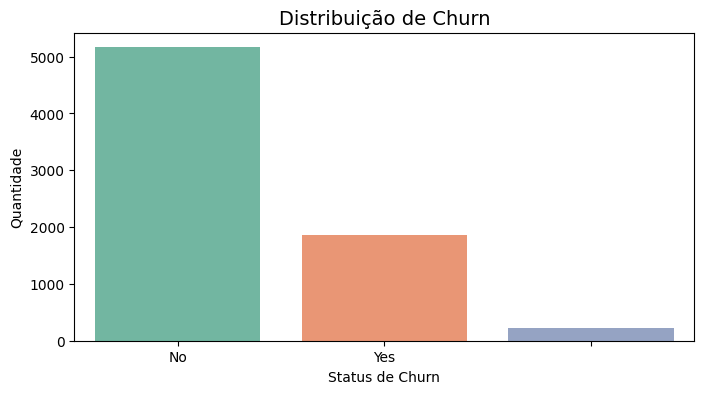

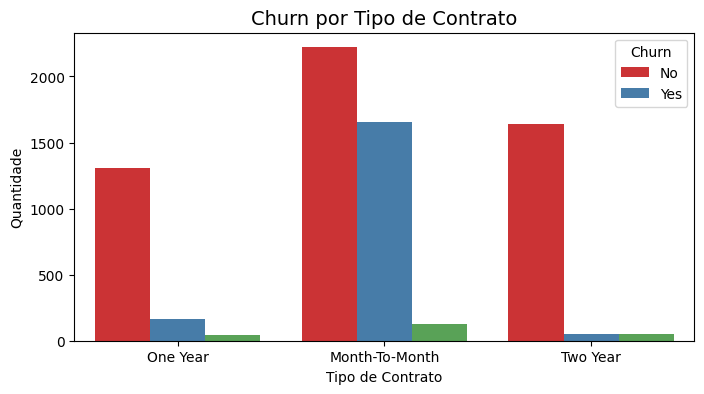

/tmp/ipython-input-8-2284449215.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_expandido, x='Churn', y='MonthlyCharges', palette='Set2')


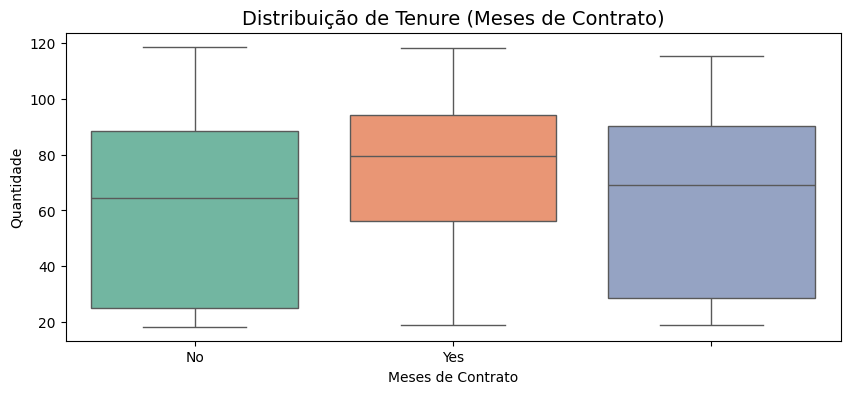

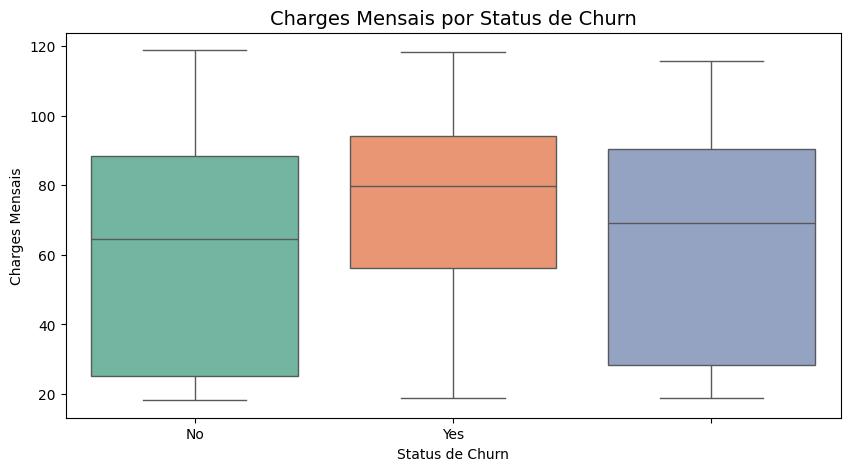

In [ ]:
# Distribuição de clientes por status de Churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df_expandido, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Distribuição de Churn', fontsize=14)
plt.xlabel('Status de Churn')
plt.ylabel('Quantidade')
plt.show()

# Relação entre tipo de contrato e Churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df_expandido, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn por Tipo de Contrato', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.legend(title='Churn')
plt.show()

# Distribuição do tempo de contrato (tenure)
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_expandido, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Distribuição de Tenure (Meses de Contrato)', fontsize=14)
plt.xlabel('Meses de Contrato')
plt.ylabel('Quantidade')
plt.show()

# Relação entre valor mensal e evasão (Monthly Charges)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_expandido, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set2', legend=False)
plt.title('Charges Mensais por Status de Churn', fontsize=14)
plt.xlabel('Status de Churn')
plt.ylabel('Charges Mensais')
plt.show()

In [ ]:
df_expandido.to_csv('dados_tratados.csv', index=False)

print('Arquivo CSV salvo com sucesso!')

Arquivo CSV salvo com sucesso!


In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelagem
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Suba o arquivo CSV que você salvou da Parte 1 (dados tratados)
df = pd.read_csv('dados_tratados.csv')

# Verificar as primeiras linhas
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One Year,Yes,Mailed Check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-To-Month,No,Mailed Check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-To-Month,Yes,Electronic Check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-To-Month,Yes,Electronic Check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-To-Month,Yes,Mailed Check,83.9,267.40


In [ ]:
# Removendo o ID do cliente, que não é relevante para o modelo
df = df.drop('customerID', axis=1)

In [ ]:
# Identificando as colunas categóricas e numéricas
colunas_categoricas = df.select_dtypes(include='object').drop('Churn', axis=1).columns
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

In [ ]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'].map({'Yes':1, 'No':0})  # Convertendo Churn em binário

In [ ]:
# Remove rows with NaN values in the target variable 'y'
nan_mask = y.isna()
X = X[~nan_mask]
y = y[~nan_mask]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap='YlGnBu', annot=False)
plt.title('Mapa de Correlação')
plt.show()

ValueError: could not convert string to float: 'No'

<Figure size 1000x800 with 0 Axes>

# 🤖 Modelagem e Avaliação

In [ ]:
# Inicializando os modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Treinando e avaliando cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("-" * 20)

--- Logistic Regression ---
Accuracy: 0.8028
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110

Confusion Matrix:
 [[1391  158]
 [ 258  303]]
--------------------
--- Random Forest ---
Accuracy: 0.7848
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1549
         1.0       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110

Confusion Matrix:
 [[1386  163]
 [ 291  270]]
--------------------
--- K-Nearest Neighbors ---
Accuracy: 0.7569
Classification Report:
            

# Task
Explain the error in the provided code, fix it if possible, and incorporate the fix into the code. If fixing is not possible, diagnose the error.

## Summarize model performance

### Subtask:
Briefly summarize the performance of each model based on the evaluation metrics.


**Reasoning**:
Review the output from the model training and evaluation step and summarize the performance of each model based on the evaluation metrics.



In [ ]:
# Summarizing the performance of each model
for name, metrics in results.items():
    print(f"--- Performance Summary for {name} ---")
    print(f"Overall Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("-" * 30)


--- Performance Summary for Logistic Regression ---
Overall Accuracy: 0.8028
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110

------------------------------
--- Performance Summary for Random Forest ---
Overall Accuracy: 0.7848
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1549
         1.0       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110

------------------------------
--- Performance Summary for K-Nearest Neighbors ---
Overall Accuracy: 0.7569
Classificatio